### **Descarga e importe de bibliotecas**

In [1]:
%%capture
# Instalar y actualizar bibliotecas necesarias
!pip install roboflow
!pip install ultralytics

# Importar bibliotecas a usar y deshabilitar WanDB
import os
import yaml
import wandb
import shutil
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roboflow import Roboflow
from ultralytics import YOLO


os.environ['WANDB_DISABLED'] = 'true'

### **Descarga y acondicionamiento de la base de datos de semillas**

In [2]:
# Descargar repositorio de aisladores
rf = Roboflow(api_key="3ioUIbqERJ2jEWElELQN")
project = rf.workspace("gcpds-tm2ae").project("seed-detection-edge")
version = project.version(2)
dataset = version.download("yolov11")
!mkdir datasets
!mv ./Seed-Detection-Edge-2 ./datasets/

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seed-Detection-Edge-2 in yolov11:: 100%|██████████| 6476/6476 [00:00<00:00, 6850.19it/s]


In [3]:
# Creación del directorio de las partes de la base de datos
data = {
    'path': './Seed-Detection-Edge-2',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 2,
    'names': ['Germinated', 'No_germinated'],
    'roboflow': {
        'license': 'CC BY 4.0',
        'project': 'seed-detection-smrzf',
        'url': 'https://universe.roboflow.com/gcpds-tm2ae/seed-detection-edge/dataset/2',
        'version': '2',
        'workspace': 'gcpds-tm2ae'}
}

# Especificar el directorio del archivo
file_path = './datasets/Seed-Detection-Edge-2/data.yaml'

# Escribir la información sobre el archivo YAML
with open(file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

### **Entrenamiento del modelo YOLOv11**

In [4]:
# Entrenar YOLOv10 para detección de semillas

# Carga de modelo preentrenado
model = YOLO('yolo11m-seg.pt')

# Entrenar el modelo
results = model.train(data='./datasets/Seed-Detection-Edge-2/data.yaml', epochs=100, imgsz=512, device=[0,1])

100%|██████████| 43.3M/43.3M [00:00<00:00, 294MB/s]
100%|██████████| 755k/755k [00:00<00:00, 40.2MB/s]
2025-03-19 16:05:01,787	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-19 16:05:03,167	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Ultralytics 8.3.93 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=2
Transferred 705/711 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 171MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/Seed-Detection-Edge-2/train/labels... 2808 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2808/2808 [00:03<00:00, 705.09it/s]


train: WARNING ⚠️ /kaggle/working/datasets/Seed-Detection-Edge-2/train/images/S03-06-2022-14_38_16_jpg.rf.ec7b705cd0c3fe01d145984bd7052c8a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/datasets/Seed-Detection-Edge-2/train/images/S03-06-2022-14_38_16_jpg.rf.fc77e858064437e36582d7a83abbdfe2.jpg: 1 duplicate labels removed
train: New cache created: /kaggle/working/datasets/Seed-Detection-Edge-2/train/labels.cache


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/Seed-Detection-Edge-2/valid/labels... 52 images, 0 backgrounds, 0 corrupt:  19%|█▊        | 52/281 [00:00<00:00, 508.75it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/Seed-Detection-Edge-2/valid/labels... 281 images, 0 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:00<00:00, 623.62it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


val: New cache created: /kaggle/working/datasets/Seed-Detection-Edge-2/valid/labels.cache


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.01G      1.039      1.328     0.8611     0.9151         69        512: 100%|██████████| 176/176 [01:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.64it/s]


                   all        281       5706      0.482      0.791        0.5      0.386      0.479      0.788      0.498        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.5G      0.984      1.213     0.6568      0.898        110        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.67it/s]


                   all        281       5706      0.854      0.822      0.852      0.645      0.849      0.819      0.847      0.528

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.51G     0.9785      1.171     0.6353      0.899        136        512: 100%|██████████| 176/176 [01:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.38it/s]


                   all        281       5706      0.814      0.791      0.819      0.618      0.803      0.789      0.806      0.484

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.51G     0.9709       1.19     0.6088     0.8986         54        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]


                   all        281       5706      0.852      0.838      0.877      0.669      0.847      0.833      0.868      0.545

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.51G      0.902      1.096      0.571     0.8808        205        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.50it/s]


                   all        281       5706      0.867      0.857      0.892      0.688      0.867      0.857      0.892      0.562

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.51G      0.907      1.108     0.5602     0.8835         79        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.50it/s]


                   all        281       5706      0.893      0.862      0.908        0.7      0.884      0.854      0.901      0.591

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.51G     0.8838      1.083     0.5451     0.8785         95        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]


                   all        281       5706      0.879      0.862      0.896      0.712      0.871      0.869      0.897      0.575

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.51G     0.8879      1.099      0.544     0.8789         73        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.891      0.854      0.897      0.704      0.891      0.854      0.895      0.556

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.51G     0.8578      1.055     0.5331     0.8725         89        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]


                   all        281       5706      0.878      0.841      0.891      0.705      0.876       0.84       0.89      0.552

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.51G      0.862       1.04     0.5192      0.867        102        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.894      0.866      0.914       0.72      0.895       0.86      0.908      0.586

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.51G     0.8552      1.047     0.5115     0.8722         63        512: 100%|██████████| 176/176 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.877       0.89      0.914      0.717      0.876      0.881      0.907      0.574

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.51G     0.8484      1.047     0.5103     0.8725        103        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.884      0.865      0.907      0.717       0.88      0.859      0.894      0.536

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.51G     0.8288      1.026     0.5021     0.8657        135        512: 100%|██████████| 176/176 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.869      0.871      0.906      0.721      0.859      0.868      0.897      0.543

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.51G     0.8306      1.029     0.4928     0.8677        174        512: 100%|██████████| 176/176 [01:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.893      0.871      0.915      0.737      0.892      0.872      0.909      0.589

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.51G       0.82      1.007     0.4868     0.8649         87        512: 100%|██████████| 176/176 [01:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.51it/s]


                   all        281       5706      0.906      0.871      0.924      0.739      0.893      0.886      0.922      0.598

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.51G     0.8187      1.012     0.4828     0.8658         74        512: 100%|██████████| 176/176 [01:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]


                   all        281       5706      0.894      0.886      0.923      0.751      0.894      0.886      0.922      0.594

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.51G     0.8102      1.007     0.4772     0.8635         83        512: 100%|██████████| 176/176 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]


                   all        281       5706      0.902      0.887      0.927      0.759      0.902      0.887      0.928      0.582

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.51G     0.8208      1.022     0.4814     0.8641        101        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.883      0.881      0.925      0.744      0.882      0.883      0.924      0.599

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.51G     0.8028     0.9978     0.4884     0.8642        102        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.881      0.872      0.915      0.744       0.88      0.872      0.911      0.589

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.51G     0.7918     0.9804     0.4646     0.8598        129        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.892      0.892      0.926      0.742      0.892      0.893      0.922      0.561

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.51G     0.7768     0.9559     0.4659     0.8545         77        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.885      0.897      0.924      0.738      0.887      0.897      0.925      0.619

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.51G     0.7796     0.9627     0.4631     0.8609         51        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.894      0.891      0.924      0.753      0.893      0.893      0.924      0.583

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.51G     0.7714     0.9546     0.4547     0.8578        105        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706       0.91      0.871      0.928       0.75      0.889       0.89      0.928      0.594

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.51G     0.7876     0.9799     0.4593      0.861        108        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.882      0.893      0.926      0.757      0.903      0.876      0.925      0.587

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.51G     0.7551      0.946     0.4495     0.8563        194        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]


                   all        281       5706      0.891      0.898      0.932      0.763      0.899      0.891      0.931      0.595

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.51G     0.7624     0.9538     0.4456     0.8548        199        512: 100%|██████████| 176/176 [01:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.50it/s]


                   all        281       5706      0.883       0.89      0.923      0.755      0.881      0.889      0.918      0.585

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.51G     0.7714     0.9604     0.4496     0.8543        109        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.894      0.898      0.926      0.756      0.897      0.892      0.925       0.59

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.51G     0.7725     0.9628     0.4544     0.8573         93        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.894      0.893      0.932      0.763      0.889      0.888      0.927      0.579

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.51G      0.777     0.9598      0.455     0.8594         83        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.895      0.899      0.931      0.762      0.896      0.898       0.93      0.601

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.51G     0.7651     0.9504      0.445     0.8537        145        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.904      0.868      0.921      0.751      0.904       0.87      0.923      0.591

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.51G     0.7574     0.9525     0.4463     0.8542        137        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.881      0.913      0.928      0.761       0.88      0.911      0.929       0.59

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.51G     0.7585     0.9532     0.4402     0.8522         92        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.907      0.886      0.926      0.752       0.91       0.89      0.926      0.597

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.51G     0.7524     0.9257     0.4376     0.8526        111        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.51it/s]


                   all        281       5706      0.896      0.899      0.933      0.768      0.898      0.894      0.929      0.605

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.51G     0.7497     0.9408     0.4427      0.851        111        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.894      0.904      0.929      0.769      0.892      0.903      0.927      0.597

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.51G     0.7475     0.9346     0.4357     0.8524        131        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.901      0.887      0.931      0.765      0.902      0.886       0.93      0.606

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.51G     0.7533     0.9379      0.441     0.8548        142        512: 100%|██████████| 176/176 [01:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.897      0.883      0.933      0.763      0.899      0.881      0.933      0.588

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.51G     0.7463     0.9204     0.4345     0.8499        108        512: 100%|██████████| 176/176 [01:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.901      0.883      0.932      0.772      0.899       0.88      0.927      0.598

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.51G     0.7404     0.9362     0.4311     0.8529        133        512: 100%|██████████| 176/176 [01:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]


                   all        281       5706      0.908      0.878      0.934      0.762        0.9       0.88      0.929      0.601

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.51G     0.7472     0.9294     0.4302     0.8518         68        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.913      0.873      0.931      0.774      0.907      0.877       0.93        0.6

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.51G     0.7271     0.8963     0.4188      0.848        218        512: 100%|██████████| 176/176 [01:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.892      0.903      0.934      0.771      0.895      0.901      0.934      0.603

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.51G     0.7283     0.9215     0.4278     0.8515        178        512: 100%|██████████| 176/176 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.49it/s]


                   all        281       5706      0.898      0.899      0.936      0.767      0.893      0.897      0.932       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.51G     0.7257     0.8982     0.4299     0.8467        111        512: 100%|██████████| 176/176 [01:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.906      0.898      0.938      0.773      0.903      0.895      0.933      0.582

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.51G     0.7196     0.8944     0.4297     0.8485        174        512: 100%|██████████| 176/176 [01:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.897      0.907      0.937      0.772      0.897      0.905      0.935      0.588

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.51G     0.7372     0.9266     0.4325     0.8512         97        512: 100%|██████████| 176/176 [01:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.901      0.875      0.932      0.773      0.901      0.876      0.934      0.595

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.51G     0.7383     0.9132     0.4287     0.8507        108        512: 100%|██████████| 176/176 [01:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.913      0.876      0.932      0.774      0.912      0.877      0.929      0.595

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.51G     0.7244     0.8928     0.4184     0.8434         99        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.899      0.899      0.938      0.779      0.893      0.895      0.933      0.603

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.51G     0.7152     0.8959     0.4094     0.8485        124        512: 100%|██████████| 176/176 [01:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.896      0.899      0.935      0.775      0.892      0.895      0.934      0.599

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.51G      0.721     0.9094     0.4156     0.8476        148        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]


                   all        281       5706      0.885      0.906      0.936      0.779      0.895      0.894      0.934      0.592

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.51G     0.7185      0.898     0.4078     0.8449         76        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.898      0.885      0.938       0.78      0.895      0.883      0.933        0.6

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.51G     0.7015     0.8737     0.4124     0.8437        171        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.905      0.894       0.94      0.779      0.902      0.892      0.936       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.51G     0.7205     0.8938      0.411     0.8438         77        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]


                   all        281       5706      0.911      0.887      0.936      0.779      0.904      0.884      0.932      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.51G     0.7209     0.9049      0.417     0.8493        137        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706        0.9      0.894      0.935      0.775      0.901      0.895      0.934      0.608

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.51G     0.7096     0.8834     0.3985      0.847        110        512: 100%|██████████| 176/176 [01:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.48it/s]


                   all        281       5706      0.908      0.882      0.936      0.782       0.91      0.878      0.933      0.606

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.51G     0.6984      0.884     0.3983     0.8447        141        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.51it/s]


                   all        281       5706      0.893      0.896      0.937       0.78       0.89      0.897      0.932      0.609

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.51G     0.7099     0.8864     0.4031     0.8432        105        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.909      0.884      0.934      0.782       0.91      0.885      0.934      0.584

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.51G     0.6983     0.8888     0.4082     0.8452         72        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.898      0.889      0.935      0.783      0.896      0.887       0.93      0.607

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.51G     0.7101      0.899      0.408     0.8446        150        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.60it/s]


                   all        281       5706      0.901      0.899      0.938      0.791        0.9      0.897      0.935      0.598

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.51G      0.703     0.8797     0.3939     0.8432        196        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.908       0.89      0.938      0.785      0.899      0.893      0.932      0.608

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.51G     0.6889     0.8622     0.3872     0.8388        106        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.896        0.9      0.937      0.786      0.898      0.894      0.934      0.606

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.51G     0.6854     0.8593     0.3894     0.8386         99        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.914      0.892      0.937      0.786      0.913      0.891      0.935      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.51G     0.7013     0.8911     0.3951     0.8445        233        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]


                   all        281       5706      0.914      0.884      0.938      0.791      0.916      0.886      0.938      0.605

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.51G     0.6903     0.8692     0.3909     0.8431        129        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.901        0.9      0.939      0.787      0.901        0.9      0.938      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.51G     0.6775     0.8539     0.3835     0.8381        197        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.911       0.89       0.94      0.787       0.91       0.89      0.938      0.604

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.51G     0.6865     0.8715     0.3891      0.842         73        512: 100%|██████████| 176/176 [01:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.884        0.9      0.933      0.782      0.914      0.874      0.933       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.51G     0.6925      0.874     0.3916     0.8403        145        512: 100%|██████████| 176/176 [01:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.904      0.886      0.938      0.787      0.903      0.882      0.935      0.611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.51G     0.6866     0.8523     0.3896     0.8412        170        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.898      0.895      0.937      0.788      0.895      0.891      0.934      0.598

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.51G     0.6853     0.8531     0.3835     0.8408         72        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.61it/s]


                   all        281       5706      0.897        0.9       0.94      0.789      0.898      0.902      0.938       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.51G      0.687     0.8496     0.3828      0.839         87        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.911      0.884      0.936      0.784       0.91      0.886      0.937      0.607

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.51G     0.6838     0.8667     0.3865     0.8395        110        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.921      0.875      0.936      0.789      0.914      0.883      0.933      0.605

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.51G      0.685     0.8687     0.3871     0.8442        100        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706       0.89      0.902       0.94      0.792      0.887      0.908       0.94       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.51G     0.6756     0.8547     0.3864      0.836        174        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.898      0.893      0.938      0.788        0.9      0.891      0.937      0.597

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.51G     0.6762     0.8516     0.3742     0.8366         87        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.886      0.902      0.937      0.789       0.89      0.901      0.938      0.614

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.51G     0.6775     0.8553     0.3815     0.8411        144        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.892      0.905      0.941      0.793      0.899      0.899      0.941      0.609

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.51G      0.668     0.8534     0.3825     0.8401        102        512: 100%|██████████| 176/176 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.52it/s]


                   all        281       5706      0.897      0.895       0.94      0.793      0.902      0.887      0.937      0.608

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.51G     0.6714     0.8443     0.3768     0.8358         74        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.917      0.872      0.939      0.793      0.875      0.913      0.936      0.607

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.51G      0.664     0.8369     0.3744     0.8346        112        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]


                   all        281       5706      0.891        0.9       0.94      0.794      0.902      0.889      0.941      0.616

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.51G     0.6679     0.8356     0.3744     0.8364        174        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.894      0.905       0.94      0.795      0.892      0.901      0.935      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.51G     0.6706     0.8389      0.377     0.8385        241        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.905       0.89       0.94      0.795      0.887      0.906      0.938      0.615

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.51G     0.6709      0.834     0.3714     0.8372        132        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.902      0.898      0.939      0.795      0.901      0.893      0.935      0.609

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.51G     0.6575     0.8269     0.3633     0.8367        162        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.899      0.897      0.938      0.796      0.898      0.896      0.936       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.51G     0.6566     0.8351      0.368     0.8376        122        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.60it/s]


                   all        281       5706      0.906      0.894      0.942      0.797      0.912      0.891      0.938      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.51G     0.6514     0.8366     0.3615     0.8351         61        512: 100%|██████████| 176/176 [01:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.55it/s]


                   all        281       5706      0.909      0.889      0.938      0.792       0.91      0.889      0.937      0.608

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.51G     0.6505     0.8231     0.3649     0.8357         82        512: 100%|██████████| 176/176 [01:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.46it/s]


                   all        281       5706      0.893      0.912      0.941      0.796      0.893      0.915      0.943      0.606

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.51G     0.6504     0.8276     0.3681     0.8323         97        512: 100%|██████████| 176/176 [01:02<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.913      0.892       0.94        0.8      0.916       0.89      0.941       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.51G     0.6602     0.8279     0.3661     0.8335        152        512: 100%|██████████| 176/176 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.899      0.907      0.941      0.796      0.899      0.906       0.94      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.51G     0.6522     0.8181      0.361     0.8332         79        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.916      0.893      0.942      0.798      0.914      0.892       0.94      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.51G     0.6442     0.8219     0.3585     0.8324        152        512: 100%|██████████| 176/176 [01:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.903      0.899      0.941      0.797      0.901      0.897      0.938      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.51G     0.6459     0.8127     0.3584     0.8315        170        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.60it/s]


                   all        281       5706      0.906      0.896       0.94      0.797      0.907      0.896      0.942       0.62

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.51G     0.6295     0.7914     0.3526     0.8273         69        512: 100%|██████████| 176/176 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706        0.9      0.904      0.943        0.8      0.899      0.902      0.941      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.51G     0.6543     0.8291     0.3609     0.8353        159        512: 100%|██████████| 176/176 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]


                   all        281       5706      0.889      0.909      0.942      0.797      0.891       0.91      0.938      0.604
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.51G     0.6418     0.8412     0.3431     0.8392         85        512: 100%|██████████| 176/176 [00:57<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.896      0.898      0.941      0.798      0.895      0.899      0.939       0.61

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.51G      0.635     0.8296      0.339     0.8345         79        512: 100%|██████████| 176/176 [00:56<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.897      0.904      0.944      0.801      0.897        0.9      0.938      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.51G     0.6378      0.837     0.3389     0.8393         71        512: 100%|██████████| 176/176 [00:55<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.53it/s]


                   all        281       5706      0.924      0.871       0.94      0.799      0.922      0.873      0.938      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.51G      0.629     0.8279     0.3394     0.8352         94        512: 100%|██████████| 176/176 [00:55<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.897      0.893      0.941      0.799      0.895      0.892      0.936      0.616

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.51G     0.6218     0.8142     0.3309     0.8335         70        512: 100%|██████████| 176/176 [00:55<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.57it/s]


                   all        281       5706      0.886      0.902      0.941      0.801      0.887      0.901      0.937      0.615

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.51G     0.6306     0.8225     0.3327     0.8342         70        512: 100%|██████████| 176/176 [00:55<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.916      0.885      0.942      0.801      0.915      0.884      0.938      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.51G     0.6194     0.8171     0.3307     0.8356         98        512: 100%|██████████| 176/176 [00:55<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.59it/s]


                   all        281       5706      0.919      0.876      0.944      0.804       0.91      0.882      0.939      0.614

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.51G     0.6201     0.8138     0.3326     0.8349        100        512: 100%|██████████| 176/176 [00:55<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.56it/s]


                   all        281       5706      0.906      0.894      0.943      0.803      0.904      0.892      0.938      0.619

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.51G     0.6242     0.8173     0.3271     0.8345         67        512: 100%|██████████| 176/176 [00:55<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.54it/s]


                   all        281       5706      0.908      0.891      0.942      0.804      0.899      0.894      0.939      0.617

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.51G     0.6094     0.8075     0.3227     0.8326         99        512: 100%|██████████| 176/176 [00:55<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.58it/s]


                   all        281       5706      0.896      0.898       0.94      0.801      0.894      0.901      0.938      0.619

100 epochs completed in 1.886 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 45.2MB
Optimizer stripped from runs/segment/train/weights/best.pt, 45.2MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]


                   all        281       5706      0.906      0.893      0.943      0.803      0.904      0.891      0.938      0.619
            Germinated        156        806      0.839      0.809      0.895      0.719      0.836      0.806      0.886      0.573
         No_germinated        281       4900      0.974      0.977      0.992      0.887      0.971      0.975      0.991      0.665
Speed: 0.2ms preprocess, 10.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/segment/train


### **Rendimiento del modelo sobre datos de validación**

In [5]:
# Validar el modelo entrenado

# Carga de modelo entrenado
model = YOLO('./runs/segment/train/weights/best.pt',task='segment') 

In [6]:
# Realizar validación
validation_results = model.val(data='./datasets/Seed-Detection-Edge-2/data.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.8,
                               iou=0.6,
                               device='0')

val: Scanning /kaggle/working/datasets/Seed-Detection-Edge-2/valid/labels.cache... 281 images, 0 backgrounds, 0 corrupt: 100%|██████████| 281/281 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]


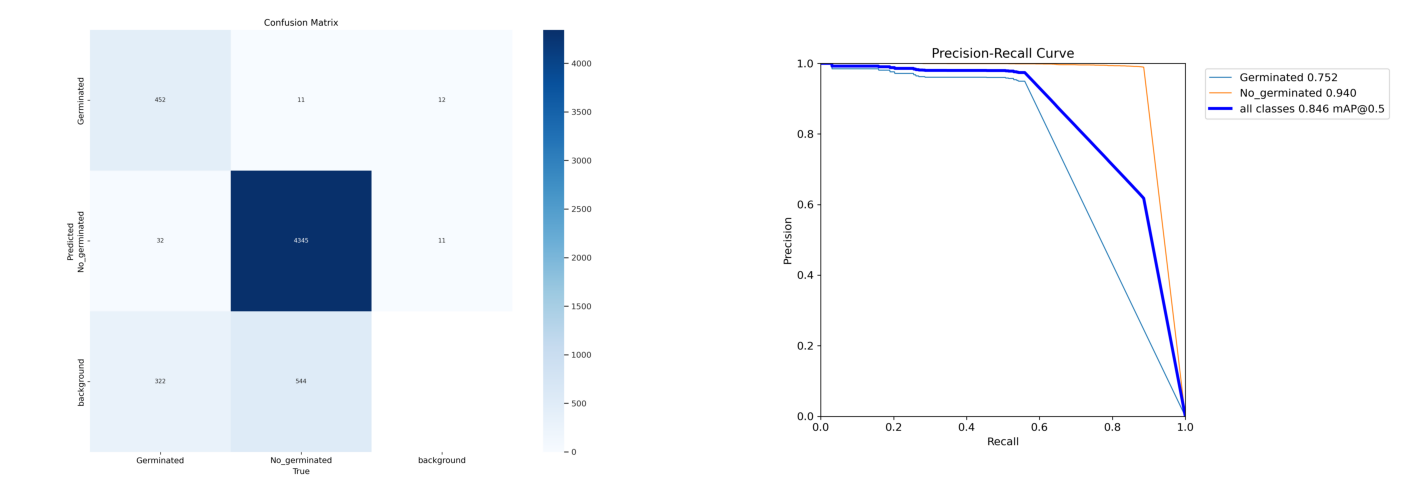

In [7]:
# Cargar la imagen
image = mpimg.imread("./runs/segment/val/confusion_matrix.png")
image_1 = mpimg.imread("./runs/segment/val/MaskPR_curve.png")

# Mostrar la matriz de confusión imagen
fig, axis = plt.subplots(1,2,figsize=(18,8))
axis[0].imshow(image)
axis[0].axis('off')
axis[1].imshow(image_1)
axis[1].axis('off')
plt.show()